In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv("/content/drive/MyDrive/Clustering_Techniques/Mall_Customers_BP.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
'''
We are going to create clusters by -> "Annual Income (k$)" & "Spending Score (1-100)"
'''

In [ ]:
# Making a copy of the actual data
df_copy = df.copy()

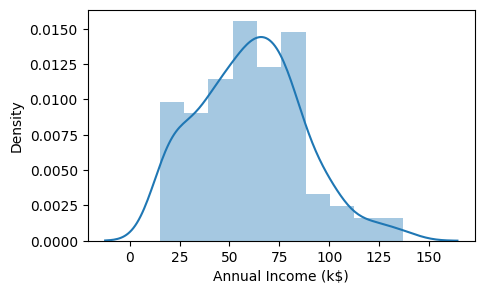

In [ ]:
# Identifying the outliers in "Annual Income (k$)"
plt.figure(figsize = (5, 3))
sns.distplot(df["Annual Income (k$)"], kde = True)
plt.show()

In [ ]:
# Calculating Q1, Q3 and Upper Limit
Q1 = df["Annual Income (k$)"].quantile(0.25)
Q3 = df["Annual Income (k$)"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
print('Upper Limit :', upper_limit)

Upper Limit : 132.75


In [ ]:
# Lower Limit
lower_limit = Q1 - 1.5 * IQR
print('Lower Limit :', lower_limit)

In [ ]:
# Filtering the outliers
df_copy_fil = df_copy[df_copy['Annual Income (k$)'] <= upper_limit]

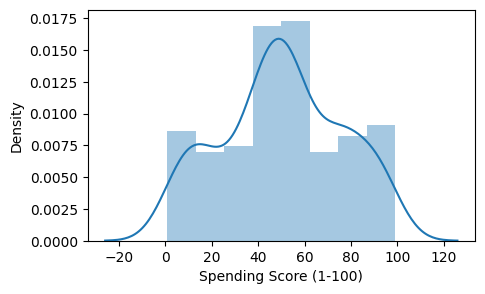

In [ ]:
# Identifying the outliers in "Spending Score (1-100)"
plt.figure(figsize = (5, 3))
sns.distplot(df_copy_fil["Spending Score (1-100)"], kde = True)
plt.show()

In [ ]:
# Performing Standard Scaling
scaler = StandardScaler()
df_copy_fil[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df_copy_fil[['Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
# Finding the optimal number of clusters

## Creating empty list and dictionary
inertias = []
mapping = {}
K = range(1, 15)

# Making an array
array1 = df_copy_fil['Annual Income (k$)'].to_numpy()
array2 = df_copy_fil['Spending Score (1-100)'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

# Loop
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(array)
    inertias.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_

In [ ]:
# Table and Plot
for key, val in mapping.items():
    print(str(key), ':', str(val))

# Plot
plt.figure(figsize = (5, 3))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.title('The Elbow Method using Inertias')
plt.show()

1 : 396.0000000000001
2 : 267.03252460194847
3 : 156.23784749493416
4 : 106.4482552392625
5 : 61.086660977120026
6 : 52.466641385634645
7 : 43.88667001940689
8 : 39.65437235323633
9 : 31.104995516539958
10 : 29.460557712297938
11 : 27.52184033066071
12 : 23.607536401650698
13 : 21.918490189849813
14 : 19.544696361657135


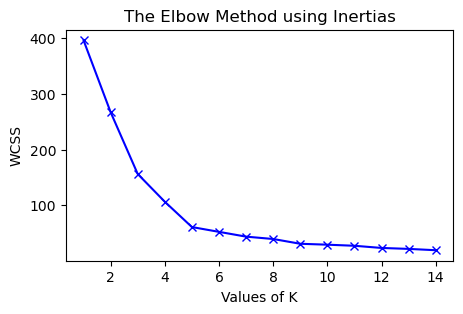

In [ ]:
# Table and Plot
for key, val in mapping.items():
    print(str(key), ':', str(val))

# Plot
plt.figure(figsize = (5, 3))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.title('The Elbow Method using Inertias')
plt.show()

In [ ]:
# k = 5 looks like optimal number of clusters in the dataset

In [ ]:
# Creating Optimal Clustering Algorithm
data = pd.DataFrame(array, columns = ['Annual Income (k$)', 'Spending Score (1-100)'])

# Optimal Model
kmeans = KMeans(n_clusters = 5)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
print('Centroids :\n', centroids)

Centroids :
 [[-1.35303699  1.13569638]
 [-0.18671971 -0.01886436]
 [ 1.0098993   1.24245028]
 [ 1.05488046 -1.27037859]
 [-1.33011303 -1.14026225]]


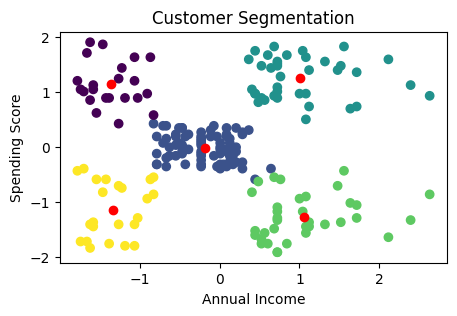

In [ ]:
# Plot
plt.figure(figsize = (5, 3))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
# Getting the columns
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [ ]:
'''
Now, we will try the following clusters ->
(1) Age, Spending Score (In - Session)
(2) For all the females, Annual Income vs Spending Score (Homework)
(3) For all

SyntaxError: incomplete input (ipython-input-4085277513.py, line 1)

In [ ]:
# Clustering for Age, Spending Score

In [ ]:
# Making a copy of the actual data
df_copy = df.copy()

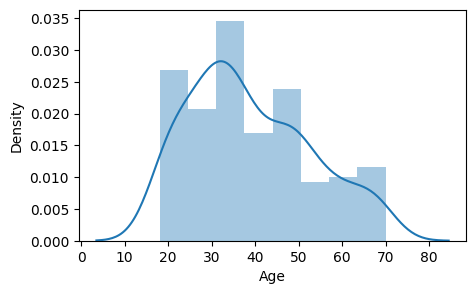

In [ ]:
# Identifying the outliers in "Age"
plt.figure(figsize = (5, 3))
sns.distplot(df["Age"], kde = True)
plt.show()

In [ ]:
# Calculating Q1, Q3 and Upper Limit
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
print('Upper Limit :', upper_limit)

Upper Limit : 79.375


In [ ]:
# There are no outliers in Age and Spending Score

In [ ]:
# Performing Standard Scaling
scaler = StandardScaler()
df_copy[['Age', 'Spending Score (1-100)']] = scaler.fit_transform(df_copy[['Age', 'Spending Score (1-100)']])

In [ ]:
# Finding the optimal number of clusters

## Creating empty list and dictionary
inertias = []
mapping = {}
K = range(1, 15)

# Making an array
array1 = df_copy['Age'].to_numpy()
array2 = df_copy['Spending Score (1-100)'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

# Loop
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(array)
    inertias.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_

In [ ]:
# Table and Plot
for key, val in mapping.items():
    print(str(key), ':', str(val))

# Plot
plt.figure(figsize = (5, 3))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.title('The Elbow Method using Inertias')
plt.show()

In [ ]:
# Creating Optimal Clustering Algorithm
data = pd.DataFrame(array, columns = ['Age', 'Spending Score (1-100)'])

# Optimal Model
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
print('Centroids :\n', centroids)

Centroids :
 [[28.95294118 73.62352941]
 [46.16521739 32.88695652]]


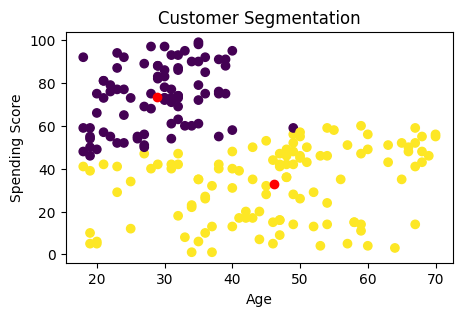

In [ ]:
# Plot
plt.figure(figsize = (5, 3))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c = kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
'''
From the above plot, we can say that there are overlapping clustering in the dataset for k = 4 and k = 6.
For k = 4 or k = 6, you can try other clustering mechanisms, if needed.
'''

'\nFrom the above plot, we can say that there are overlapping clustering in the dataset for k = 4 and k = 6.\nFor k = 4 or k = 6, you can try other clustering mechanisms, if needed. \n'